In [1]:
import sys 
sys.path.append("/home/karen/Documents/GitHub/Muscle_wasting/network")
sys.path.append("/home/karen/Documents/GitHub/Muscle_wasting/database_analysis")
sys.path.append("/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.10/site-packages")
sys.path.append("/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.10/site-packages/networkx")

In [2]:
cd /home/karen/Documents/GitHub/Muscle_wasting

/home/karen/Documents/GitHub/Muscle_wasting


# Analyzing the relevance of the mirnas

Now we saw with the filtered and whole network
Let's get the mirnas from the relevant PR score and then evaluate them on the whole network

In [3]:
import walking_network as wn

In [4]:
import networkx as nx

In [5]:
import pandas as pd
import numpy as np

We are going to load a graph with the mirnas and with the cut of pagerank to only get relevant genes on the network, however we should do it for the full gone, since genes belonging to pathways may be discarted on this PR evaluation. 

In [6]:
whole_network = nx.read_gpickle(f"network/Networks_pkl/pathway_n_tf_mirnas__tf_network_cutoff_0.pkl")

In [7]:
pr_network = nx.read_gpickle(f"network/Networks_pkl/pathway_n_tf_mirnas__tf_network_cutoff_0.2.pkl")

In [8]:
steps=5

In [9]:
import matplotlib.pyplot as plt
#nx.draw_networkx(network)
#plt.show()

In [10]:
miR_nodes = [node for node in pr_network.nodes if node.startswith('hsa-miR')]
len(miR_nodes)

13

In [11]:
mirPaths={}
for mir in miR_nodes:
    p = wn.get_pathways(graph=whole_network, mirna=mir, n_distance=steps, sample_size=10)
    unique_set = set(tuple(lst) for lst in p)
    
    # Convert back to a list of lists
    unique_list = [list(tpl) for tpl in unique_set]
    mirPaths[mir]=unique_list


In [25]:
mirPaths_2={}
mirPaths_2['hsa-miR-21-5p']= mirPaths['hsa-miR-21-5p']
mirPaths_2['hsa-miR-145-5p']= mirPaths['hsa-miR-145-5p']
mirPaths_2['hsa-miR-93-5p']= mirPaths['hsa-miR-93-5p']
mirPaths_2

{'hsa-miR-21-5p': [['hsa-miR-21-5p', 'EGLN1'],
  ['hsa-miR-21-5p', 'SMAD7', 'MYC', 'CAMK2N1'],
  ['hsa-miR-21-5p', 'PPIF'],
  ['hsa-miR-21-5p', 'APAF1'],
  ['hsa-miR-21-5p', 'TPM1'],
  ['hsa-miR-21-5p', 'MSH2'],
  ['hsa-miR-21-5p', 'LRRFIP1', 'RHOA'],
  ['hsa-miR-21-5p', 'DNM1L']],
 'hsa-miR-145-5p': [['hsa-miR-145-5p', 'STAT1', 'STAT1', 'PPIP5K2'],
  ['hsa-miR-145-5p', 'STAT1', 'STAT1', 'IL1B'],
  ['hsa-miR-145-5p', 'MUC1'],
  ['hsa-miR-145-5p', 'EPAS1', 'GAPDH'],
  ['hsa-miR-145-5p', 'SP7', 'SP7', 'hsa-miR-93-5p', 'VEGFA'],
  ['hsa-miR-145-5p', 'E2F3', 'MAP3K5'],
  ['hsa-miR-145-5p', 'VEGFA'],
  ['hsa-miR-145-5p', 'EPAS1', 'EPAS1', 'PGR'],
  ['hsa-miR-145-5p', 'STAT1', 'HMGB1']],
 'hsa-miR-93-5p': [['hsa-miR-93-5p', 'VEGFA'], ['hsa-miR-93-5p', 'FOXO3']]}

In [26]:
sub_graph= wn.join_paths(whole_network, mirPaths)
sub_graph

In [12]:
sub_graph = wn.join_paths(whole_network, mirPaths)

In [34]:
sub_graph.nodes()

NodeView(('PPIF', 'TPM1', 'HMGB1', 'hsa-miR-93-5p', 'MSH2', 'EGLN1', 'hsa-miR-21-5p', 'SP7', 'IL1B', 'LRRFIP1', 'STAT1', 'hsa-miR-145-5p', 'FOXO3', 'VEGFA', 'E2F3', 'CAMK2N1', 'MUC1', 'APAF1', 'RHOA', 'SMAD7', 'EPAS1', 'DNM1L', 'MYC', 'PGR', 'MAP3K5', 'GAPDH', 'PPIP5K2'))

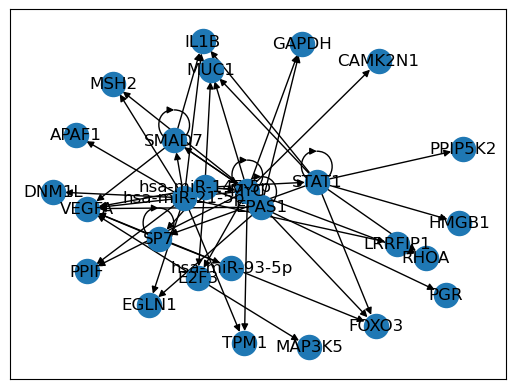

In [28]:
nx.draw_networkx(sub_graph)
plt.show()

In [30]:
isolated_nodes = list(nx.isolates(sub_graph))

In [29]:
nx.is_frozen(sub_graph)

True

In [31]:
sub_network = sub_graph.copy()

In [32]:
sub_network.remove_nodes_from(isolated_nodes)


In [19]:
start_node = 'hsa-miR-21-5p'

In [22]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting'

In [33]:
nx.write_gpickle(sub_network, 'network/sub_network_nodes_short.pkl')

In [20]:
node_values, node_marks, node_visited =  wn.traverse_and_update(sub_network, start_node)

hsa-miR-21-5p TPM1
hsa-miR-21-5p LRRFIP1
LRRFIP1 RHOA


KeyError: 'weight'

In [26]:
nx.is_frozen(sub_network)

False

In [37]:
mirInfluence={}
for mir, path in mirPaths.items():
    influence = wn.get_influence(whole_network, path)
    mirInfluence[mir]=influence
#mirInfluence

In [38]:
mir_pathway_influence = {}
for mir, influence_data in  mirInfluence.items():
    pi = wn.evaluate_pathway_influence(influence_data)
    mir_pathway_influence[mir]=pi

mir_de_influence = {}
for mir, influence_data in  mirInfluence.items():
    pi = wn.evaluate_de_influence(influence_data)
    mir_de_influence[mir]=pi


In [39]:
mir_pathway_influence_df = pd.DataFrame(mir_pathway_influence).T
#mir_pathway_influence_df = mir_pathway_influence_df.drop(columns=["Different_pathways", "Total"])
mir_pathway_influence_df['participation'] = mir_pathway_influence_df.drop(columns=["Different_pathways", "Total"]).sum(axis=1)
mir_pathway_influence_df

,ATP,MITOCHONDRI,RESPIRAT,METABOLI,OXIDATIVE_PHOSPHORYLATION,NONALCOHOLIC_FATTY_LIVER,MUSCLE,ELECTRON,Different_pathways,Total,participation
hsa-miR-223,0,0,0,0,0,0,0,0,0,0,0
hsa-miR-21-5p,1,4,3,4,1,2,0,1,21,200,16
hsa-miR-210-3p,0,0,0,0,0,1,0,0,3,32,1
hsa-miR-122,0,0,0,0,0,0,0,0,0,0,0
hsa-miR-145-5p,0,0,0,2,0,0,1,0,8,136,3
hsa-miR-224-5p,0,0,0,0,0,1,0,0,2,16,1
hsa-miR-93-5p,0,1,0,0,0,0,0,0,2,16,1
hsa-miR-342,0,0,0,0,0,0,0,0,0,0,0
hsa-miR-221,0,0,0,0,0,0,0,0,0,0,0
hsa-miR-375,0,0,0,0,0,0,0,0,0,0,0


In [40]:
mean_influence  = mir_pathway_influence_df.loc[:, 'MITOCHONDRI'].mean()
mean_influence

0.46153846153846156

In [41]:
mitocondrial_df = mir_pathway_influence_df[mir_pathway_influence_df['MITOCHONDRI']>mean_influence].sort_values('MITOCHONDRI', ascending=False)
mitocondrial_df['Rate']=mir_pathway_influence_df['MITOCHONDRI']/mir_pathway_influence_df['participation']


In [42]:
mitocondrial_df[mitocondrial_df['Different_pathways']<10].sort_values('MUSCLE',ascending=False)

,ATP,MITOCHONDRI,RESPIRAT,METABOLI,OXIDATIVE_PHOSPHORYLATION,NONALCOHOLIC_FATTY_LIVER,MUSCLE,ELECTRON,Different_pathways,Total,participation,Rate
hsa-miR-93-5p,0,1,0,0,0,0,0,0,2,16,1,1.0


In [43]:
mir_de_influence_df = pd.DataFrame(mir_de_influence).T


In [44]:
mir_de_influence_df[mir_de_influence_df['yo']>0]

,m_l,m_s,yo,ym,mo
hsa-miR-21-5p,0,0,8,0,1
hsa-miR-210-3p,0,0,5,1,1
hsa-miR-145-5p,0,0,9,0,2
hsa-miR-224-5p,0,0,1,0,0
hsa-miR-93-5p,0,0,2,0,0
hsa-miR-375,0,0,1,0,0
hsa-miR-143-3p,0,0,7,1,1


In [45]:
mir_de_influence_df[mir_de_influence_df['mo']>0]

,m_l,m_s,yo,ym,mo
hsa-miR-21-5p,0,0,8,0,1
hsa-miR-210-3p,0,0,5,1,1
hsa-miR-145-5p,0,0,9,0,2
hsa-miR-143-3p,0,0,7,1,1


In [46]:
mirs_all_infliences = mir_de_influence_df[(mir_de_influence_df['ym']>0)|(mir_de_influence_df['mo']>0)|(mir_de_influence_df['yo']>0)]
mirs_all_infliences

,m_l,m_s,yo,ym,mo
hsa-miR-21-5p,0,0,8,0,1
hsa-miR-210-3p,0,0,5,1,1
hsa-miR-145-5p,0,0,9,0,2
hsa-miR-224-5p,0,0,1,0,0
hsa-miR-93-5p,0,0,2,0,0
hsa-miR-375,0,0,1,0,0
hsa-miR-143-3p,0,0,7,1,1


In [47]:
sel_mirs_list = list(mirs_all_infliences.index)
len(sel_mirs_list)

7

In [48]:
mir_pathway_influence_df_filteres = mir_pathway_influence_df[mir_pathway_influence_df.index.isin(sel_mirs_list)]

In [49]:
mir_pathway_influence_df_filteres#[mir_pathway_influence_df_filteres['MUSCLE']>0].sort_values('MUSCLE')

,ATP,MITOCHONDRI,RESPIRAT,METABOLI,OXIDATIVE_PHOSPHORYLATION,NONALCOHOLIC_FATTY_LIVER,MUSCLE,ELECTRON,Different_pathways,Total,participation
hsa-miR-21-5p,1,4,3,4,1,2,0,1,21,200,16
hsa-miR-210-3p,0,0,0,0,0,1,0,0,3,32,1
hsa-miR-145-5p,0,0,0,2,0,0,1,0,8,136,3
hsa-miR-224-5p,0,0,0,0,0,1,0,0,2,16,1
hsa-miR-93-5p,0,1,0,0,0,0,0,0,2,16,1
hsa-miR-375,0,0,0,0,0,0,0,0,0,0,0
hsa-miR-143-3p,1,1,0,4,0,0,4,0,12,128,10


In [50]:
mirPaths['hsa-miR-21-5p']

[['hsa-miR-21-5p', 'EGLN1'],
 ['hsa-miR-21-5p', 'APAF1'],
 ['hsa-miR-21-5p', 'SMAD7', 'E2F1', 'E2F1', 'PIN1'],
 ['hsa-miR-21-5p', 'PPIF'],
 ['hsa-miR-21-5p', 'DNM1L'],
 ['hsa-miR-21-5p', 'PPARA', 'BSG'],
 ['hsa-miR-21-5p', 'DAXX', 'NR3C1', 'AFP'],
 ['hsa-miR-21-5p', 'IL1B']]

In [51]:
mirPaths['hsa-miR-93-5p']

[['hsa-miR-93-5p', 'VEGFA'], ['hsa-miR-93-5p', 'FOXO3']]

In [52]:
mirPaths

{'hsa-miR-223': [['hsa-miR-223']],
 'hsa-miR-21-5p': [['hsa-miR-21-5p', 'EGLN1'],
  ['hsa-miR-21-5p', 'APAF1'],
  ['hsa-miR-21-5p', 'SMAD7', 'E2F1', 'E2F1', 'PIN1'],
  ['hsa-miR-21-5p', 'PPIF'],
  ['hsa-miR-21-5p', 'DNM1L'],
  ['hsa-miR-21-5p', 'PPARA', 'BSG'],
  ['hsa-miR-21-5p', 'DAXX', 'NR3C1', 'AFP'],
  ['hsa-miR-21-5p', 'IL1B']],
 'hsa-miR-210-3p': [['hsa-miR-210-3p', 'CASP8AP2'],
  ['hsa-miR-210-3p', 'E2F3', 'MAP3K5'],
  ['hsa-miR-210-3p', 'E2F3', 'VEGFA'],
  ['hsa-miR-210-3p', 'E2F3', 'CUX1', 'CHD4', 'CD79A'],
  ['hsa-miR-210-3p', 'E2F3', 'ATM']],
 'hsa-miR-122': [['hsa-miR-122']],
 'hsa-miR-145-5p': [['hsa-miR-145-5p', 'E2F3', 'E2F1', 'VEGFA'],
  ['hsa-miR-145-5p', 'EPAS1', 'DDC'],
  ['hsa-miR-145-5p', 'SP7', 'hsa-miR-93-5p', 'VEGFA'],
  ['hsa-miR-145-5p', 'EPAS1', 'VEGFA'],
  ['hsa-miR-145-5p', 'MYC', 'RPL6'],
  ['hsa-miR-145-5p', 'E2F3', 'VEGFA'],
  ['hsa-miR-145-5p', 'VEGFA'],
  ['hsa-miR-145-5p', 'SP7', 'VEGFA'],
  ['hsa-miR-145-5p', 'STAT1', 'SP7', 'VEGFA']],
 'hsa-miR-224